In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import datetime

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = os.path.join(f.readline().rstrip("\n"))
f.close() 

In [3]:
path_to_hydroestimator = os.path.join(path_to_dataset,'HE')

In [4]:
path_to_data = os.path.join(path_to_hydroestimator, '202012')
print(path_to_data)

/export/home/ingrid/Dendrite/UserAreas/Ingrid/HE/202012


In [5]:
M = 1613
N = 1349

lat_0 = -44.95
d_lat = 0.0359477
lats = lat_0 + np.arange(M) * d_lat

lon_0 = 278.0 - 360
d_lon = 0.0382513
lons = lon_0 + np.arange(N) * d_lon

In [6]:
locs = pd.read_pickle(os.path.join('../reference/','rain_gauge_locs.pckl'))

In [7]:
lon_inds = np.array([])
for l in locs['lon']:
    idx = (np.abs(lons - l)).argmin()
    lon_inds = np.append(lon_inds,idx)

lat_inds = np.array([])
for l in locs['lat']:
    idx = (np.abs(lats - l)).argmin()
    lat_inds = np.append(lat_inds,idx)

lon_inds = lon_inds.astype(int)
lat_inds = lat_inds.astype(int)

In [8]:
datasets = []

for file in os.listdir(path_to_data):
    print(file)
    try:

        precip = np.fromfile(os.path.join(path_to_data,file), dtype="u2").reshape((M, N))/10.0
        precip = precip[::-1, :]
        #print(precip)
        vals_at_gauges = np.stack([precip[lat_ind, lon_ind] for lat_ind,lon_ind in zip(lat_inds, lon_inds)])
        #print(vals_at_gauges.shape)

        
        da = xr.Dataset(data_vars = {'HE_precip': (["location"], vals_at_gauges)}, 
                        coords=dict([("location", list(range(vals_at_gauges.shape[0])))]))
        print(file.split('_')[1][:-4])
        t = datetime.datetime.strptime(file.split('_')[1][:-4], '%Y%m%d%H%M')
        print(t)
        da = da.assign_coords(dict(time=t))
        da = da.expand_dims('time').set_coords('time')
        datasets.append(da)
    except:
        pass
    

S11636382_202012181240.bin
202012181240
2020-12-18 12:40:00
S11636382_202012181310.bin
202012181310
2020-12-18 13:10:00
S11636382_202012181320.bin
202012181320
2020-12-18 13:20:00
S11636382_202012181340.bin
202012181340
2020-12-18 13:40:00
S11636382_202012080450.bin
202012080450
2020-12-08 04:50:00
S11636382_202012181500.bin
202012181500
2020-12-18 15:00:00
S11636382_202012181520.bin
202012181520
2020-12-18 15:20:00
S11636382_202012010000.bin
202012010000
2020-12-01 00:00:00
S11636382_202012010130.bin
202012010130
2020-12-01 01:30:00
S11636382_202012010140.bin
202012010140
2020-12-01 01:40:00
S11636382_202012010310.bin
202012010310
2020-12-01 03:10:00
S11636382_202012010340.bin
202012010340
2020-12-01 03:40:00
S11636382_202012010440.bin
202012010440
2020-12-01 04:40:00
S11636382_202012010500.bin
202012010500
2020-12-01 05:00:00
S11636382_202012010550.bin
202012010550
2020-12-01 05:50:00
S11636382_202012010610.bin
202012010610
2020-12-01 06:10:00
S11636382_202012010620.bin
202012010620


202012041820
2020-12-04 18:20:00
S11636382_202012041830.bin
202012041830
2020-12-04 18:30:00
S11636382_202012041910.bin
202012041910
2020-12-04 19:10:00
S11636382_202012041930.bin
202012041930
2020-12-04 19:30:00
S11636382_202012041950.bin
202012041950
2020-12-04 19:50:00
S11636382_202012042100.bin
202012042100
2020-12-04 21:00:00
S11636382_202012042150.bin
202012042150
2020-12-04 21:50:00
S11636382_202012042240.bin
202012042240
2020-12-04 22:40:00
S11636382_202012042310.bin
202012042310
2020-12-04 23:10:00
S11636382_202012042320.bin
202012042320
2020-12-04 23:20:00
S11636382_202012042350.bin
202012042350
2020-12-04 23:50:00
S11636382_202012050010.bin
202012050010
2020-12-05 00:10:00
S11636382_202012050350.bin
202012050350
2020-12-05 03:50:00
S11636382_202012050400.bin
202012050400
2020-12-05 04:00:00
S11636382_202012050410.bin
202012050410
2020-12-05 04:10:00
S11636382_202012050520.bin
202012050520
2020-12-05 05:20:00
S11636382_202012050600.bin
202012050600
2020-12-05 06:00:00
S116363

202012090940
2020-12-09 09:40:00
S11636382_202012091250.bin
202012091250
2020-12-09 12:50:00
S11636382_202012091320.bin
202012091320
2020-12-09 13:20:00
S11636382_202012091410.bin
202012091410
2020-12-09 14:10:00
S11636382_202012091440.bin
202012091440
2020-12-09 14:40:00
S11636382_202012091540.bin
202012091540
2020-12-09 15:40:00
S11636382_202012091550.bin
202012091550
2020-12-09 15:50:00
S11636382_202012091610.bin
202012091610
2020-12-09 16:10:00
S11636382_202012091630.bin
202012091630
2020-12-09 16:30:00
S11636382_202012091700.bin
202012091700
2020-12-09 17:00:00
S11636382_202012091740.bin
202012091740
2020-12-09 17:40:00
S11636382_202012091840.bin
202012091840
2020-12-09 18:40:00
S11636382_202012092110.bin
202012092110
2020-12-09 21:10:00
S11636382_202012092130.bin
202012092130
2020-12-09 21:30:00
S11636382_202012100050.bin
202012100050
2020-12-10 00:50:00
S11636382_202012100330.bin
202012100330
2020-12-10 03:30:00
S11636382_202012100350.bin
202012100350
2020-12-10 03:50:00
S116363

202012132210
2020-12-13 22:10:00
S11636382_202012132250.bin
202012132250
2020-12-13 22:50:00
S11636382_202012132300.bin
202012132300
2020-12-13 23:00:00
S11636382_202012132310.bin
202012132310
2020-12-13 23:10:00
S11636382_202012132340.bin
202012132340
2020-12-13 23:40:00
S11636382_202012140140.bin
202012140140
2020-12-14 01:40:00
S11636382_202012140150.bin
202012140150
2020-12-14 01:50:00
S11636382_202012150120.bin
202012150120
2020-12-15 01:20:00
S11636382_202012140430.bin
202012140430
2020-12-14 04:30:00
S11636382_202012150140.bin
202012150140
2020-12-15 01:40:00
S11636382_202012140740.bin
202012140740
2020-12-14 07:40:00
S11636382_202012140810.bin
202012140810
2020-12-14 08:10:00
S11636382_202012140900.bin
202012140900
2020-12-14 09:00:00
S11636382_202012140910.bin
202012140910
2020-12-14 09:10:00
S11636382_202012141030.bin
202012141030
2020-12-14 10:30:00
S11636382_202012141100.bin
202012141100
2020-12-14 11:00:00
S11636382_202012141140.bin
202012141140
2020-12-14 11:40:00
S116363

202012180800
2020-12-18 08:00:00
S11636382_202012180900.bin
202012180900
2020-12-18 09:00:00
S11636382_202012181010.bin
202012181010
2020-12-18 10:10:00
S11636382_202012181020.bin
202012181020
2020-12-18 10:20:00
S11636382_202012181750.bin
202012181750
2020-12-18 17:50:00
S11636382_202012181120.bin
202012181120
2020-12-18 11:20:00
S11636382_202012181210.bin
202012181210
2020-12-18 12:10:00
S11636382_202012181220.bin
202012181220
2020-12-18 12:20:00
S11636382_202012181800.bin
202012181800
2020-12-18 18:00:00
S11636382_202012181940.bin
202012181940
2020-12-18 19:40:00
S11636382_202012182020.bin
202012182020
2020-12-18 20:20:00
S11636382_202012182110.bin
202012182110
2020-12-18 21:10:00
S11636382_202012182150.bin
202012182150
2020-12-18 21:50:00
S11636382_202012182210.bin
202012182210
2020-12-18 22:10:00
S11636382_202012182220.bin
202012182220
2020-12-18 22:20:00
S11636382_202012182310.bin
202012182310
2020-12-18 23:10:00
S11636382_202012190030.bin
202012190030
2020-12-19 00:30:00
S116363

202012220610
2020-12-22 06:10:00
S11636382_202012220800.bin
202012220800
2020-12-22 08:00:00
S11636382_202012220840.bin
202012220840
2020-12-22 08:40:00
S11636382_202012220940.bin
202012220940
2020-12-22 09:40:00
S11636382_202012221100.bin
202012221100
2020-12-22 11:00:00
S11636382_202012221320.bin
202012221320
2020-12-22 13:20:00
S11636382_202012221410.bin
202012221410
2020-12-22 14:10:00
S11636382_202012221440.bin
202012221440
2020-12-22 14:40:00
S11636382_202012221500.bin
202012221500
2020-12-22 15:00:00
S11636382_202012221600.bin
202012221600
2020-12-22 16:00:00
S11636382_202012221620.bin
202012221620
2020-12-22 16:20:00
S11636382_202012221700.bin
202012221700
2020-12-22 17:00:00
S11636382_202012221730.bin
202012221730
2020-12-22 17:30:00
S11636382_202012221750.bin
202012221750
2020-12-22 17:50:00
S11636382_202012221800.bin
202012221800
2020-12-22 18:00:00
S11636382_202012221940.bin
202012221940
2020-12-22 19:40:00
S11636382_202012221950.bin
202012221950
2020-12-22 19:50:00
S116363

202012261840
2020-12-26 18:40:00
S11636382_202012261910.bin
202012261910
2020-12-26 19:10:00
S11636382_202012261950.bin
202012261950
2020-12-26 19:50:00
S11636382_202012262020.bin
202012262020
2020-12-26 20:20:00
S11636382_202012262110.bin
202012262110
2020-12-26 21:10:00
S11636382_202012262120.bin
202012262120
2020-12-26 21:20:00
S11636382_202012262140.bin
202012262140
2020-12-26 21:40:00
S11636382_202012262150.bin
202012262150
2020-12-26 21:50:00
S11636382_202012262340.bin
202012262340
2020-12-26 23:40:00
S11636382_202012270120.bin
202012270120
2020-12-27 01:20:00
S11636382_202012270210.bin
202012270210
2020-12-27 02:10:00
S11636382_202012270220.bin
202012270220
2020-12-27 02:20:00
S11636382_202012270240.bin
202012270240
2020-12-27 02:40:00
S11636382_202012270250.bin
202012270250
2020-12-27 02:50:00
S11636382_202012270430.bin
202012270430
2020-12-27 04:30:00
S11636382_202012270450.bin
202012270450
2020-12-27 04:50:00
S11636382_202012270510.bin
202012270510
2020-12-27 05:10:00
S116363

202012302200
2020-12-30 22:00:00
S11636382_202012302250.bin
202012302250
2020-12-30 22:50:00
S11636382_202012302300.bin
202012302300
2020-12-30 23:00:00
S11636382_202012302320.bin
202012302320
2020-12-30 23:20:00
S11636382_202012302330.bin
202012302330
2020-12-30 23:30:00
S11636382_202012302340.bin
202012302340
2020-12-30 23:40:00
S11636382_202012310020.bin
202012310020
2020-12-31 00:20:00
S11636382_202012310030.bin
202012310030
2020-12-31 00:30:00
S11636382_202012310110.bin
202012310110
2020-12-31 01:10:00
S11636382_202012310120.bin
202012310120
2020-12-31 01:20:00
S11636382_202012310130.bin
202012310130
2020-12-31 01:30:00
S11636382_202012310140.bin
202012310140
2020-12-31 01:40:00
S11636382_202012310200.bin
202012310200
2020-12-31 02:00:00
S11636382_202012310210.bin
202012310210
2020-12-31 02:10:00
S11636382_202012310410.bin
202012310410
2020-12-31 04:10:00
S11636382_202012310440.bin
202012310440
2020-12-31 04:40:00
S11636382_202012310600.bin
202012310600
2020-12-31 06:00:00
S116363

202012031550
2020-12-03 15:50:00
S11636382_202012031600.bin
202012031600
2020-12-03 16:00:00
S11636382_202012031720.bin
202012031720
2020-12-03 17:20:00
S11636382_202012031850.bin
202012031850
2020-12-03 18:50:00
S11636382_202012031900.bin
202012031900
2020-12-03 19:00:00
S11636382_202012032220.bin
202012032220
2020-12-03 22:20:00
S11636382_202012032010.bin
202012032010
2020-12-03 20:10:00
S11636382_202012032050.bin
202012032050
2020-12-03 20:50:00
S11636382_202012040000.bin
202012040000
2020-12-04 00:00:00
S11636382_202012032140.bin
202012032140
2020-12-03 21:40:00
S11636382_202012032350.bin
202012032350
2020-12-03 23:50:00
S11636382_202012040050.bin
202012040050
2020-12-04 00:50:00
S11636382_202012040120.bin
202012040120
2020-12-04 01:20:00
S11636382_202012040130.bin
202012040130
2020-12-04 01:30:00
S11636382_202012040330.bin
202012040330
2020-12-04 03:30:00
S11636382_202012040350.bin
202012040350
2020-12-04 03:50:00
S11636382_202012040520.bin
202012040520
2020-12-04 05:20:00
S116363

202012080300
2020-12-08 03:00:00
S11636382_202012080310.bin
202012080310
2020-12-08 03:10:00
S11636382_202012080320.bin
202012080320
2020-12-08 03:20:00
S11636382_202012080500.bin
202012080500
2020-12-08 05:00:00
S11636382_202012080510.bin
202012080510
2020-12-08 05:10:00
S11636382_202012110940.bin
202012110940
2020-12-11 09:40:00
S11636382_202012080610.bin
202012080610
2020-12-08 06:10:00
S11636382_202012081000.bin
202012081000
2020-12-08 10:00:00
S11636382_202012081020.bin
202012081020
2020-12-08 10:20:00
S11636382_202012081030.bin
202012081030
2020-12-08 10:30:00
S11636382_202012081150.bin
202012081150
2020-12-08 11:50:00
S11636382_202012081250.bin
202012081250
2020-12-08 12:50:00
S11636382_202012081340.bin
202012081340
2020-12-08 13:40:00
S11636382_202012081510.bin
202012081510
2020-12-08 15:10:00
S11636382_202012081520.bin
202012081520
2020-12-08 15:20:00
S11636382_202012081530.bin
202012081530
2020-12-08 15:30:00
S11636382_202012081550.bin
202012081550
2020-12-08 15:50:00
S116363

202012120710
2020-12-12 07:10:00
S11636382_202012120750.bin
202012120750
2020-12-12 07:50:00
S11636382_202012120850.bin
202012120850
2020-12-12 08:50:00
S11636382_202012121000.bin
202012121000
2020-12-12 10:00:00
S11636382_202012121010.bin
202012121010
2020-12-12 10:10:00
S11636382_202012121050.bin
202012121050
2020-12-12 10:50:00
S11636382_202012121140.bin
202012121140
2020-12-12 11:40:00
S11636382_202012121230.bin
202012121230
2020-12-12 12:30:00
S11636382_202012121310.bin
202012121310
2020-12-12 13:10:00
S11636382_202012121330.bin
202012121330
2020-12-12 13:30:00
S11636382_202012121430.bin
202012121430
2020-12-12 14:30:00
S11636382_202012121500.bin
202012121500
2020-12-12 15:00:00
S11636382_202012121530.bin
202012121530
2020-12-12 15:30:00
S11636382_202012121540.bin
202012121540
2020-12-12 15:40:00
S11636382_202012121830.bin
202012121830
2020-12-12 18:30:00
S11636382_202012121850.bin
202012121850
2020-12-12 18:50:00
S11636382_202012121910.bin
202012121910
2020-12-12 19:10:00
S116363

202012161210
2020-12-16 12:10:00
S11636382_202012161220.bin
202012161220
2020-12-16 12:20:00
S11636382_202012161810.bin
202012161810
2020-12-16 18:10:00
S11636382_202012161400.bin
202012161400
2020-12-16 14:00:00
S11636382_202012161430.bin
202012161430
2020-12-16 14:30:00
S11636382_202012161550.bin
202012161550
2020-12-16 15:50:00
S11636382_202012161750.bin
202012161750
2020-12-16 17:50:00
S11636382_202012162140.bin
202012162140
2020-12-16 21:40:00
S11636382_202012161850.bin
202012161850
2020-12-16 18:50:00
S11636382_202012162010.bin
202012162010
2020-12-16 20:10:00
S11636382_202012162110.bin
202012162110
2020-12-16 21:10:00
S11636382_202012162150.bin
202012162150
2020-12-16 21:50:00
S11636382_202012162200.bin
202012162200
2020-12-16 22:00:00
S11636382_202012162320.bin
202012162320
2020-12-16 23:20:00
S11636382_202012170310.bin
202012170310
2020-12-17 03:10:00
S11636382_202012170000.bin
202012170000
2020-12-17 00:00:00
S11636382_202012170020.bin
202012170020
2020-12-17 00:20:00
S116363

202012210250
2020-12-21 02:50:00
S11636382_202012210310.bin
202012210310
2020-12-21 03:10:00
S11636382_202012210320.bin
202012210320
2020-12-21 03:20:00
S11636382_202012210410.bin
202012210410
2020-12-21 04:10:00
S11636382_202012210430.bin
202012210430
2020-12-21 04:30:00
S11636382_202012210440.bin
202012210440
2020-12-21 04:40:00
S11636382_202012210450.bin
202012210450
2020-12-21 04:50:00
S11636382_202012210540.bin
202012210540
2020-12-21 05:40:00
S11636382_202012210600.bin
202012210600
2020-12-21 06:00:00
S11636382_202012210610.bin
202012210610
2020-12-21 06:10:00
S11636382_202012210640.bin
202012210640
2020-12-21 06:40:00
S11636382_202012210740.bin
202012210740
2020-12-21 07:40:00
S11636382_202012210800.bin
202012210800
2020-12-21 08:00:00
S11636382_202012210810.bin
202012210810
2020-12-21 08:10:00
S11636382_202012210820.bin
202012210820
2020-12-21 08:20:00
S11636382_202012210840.bin
202012210840
2020-12-21 08:40:00
S11636382_202012210950.bin
202012210950
2020-12-21 09:50:00
S116363

202012250730
2020-12-25 07:30:00
S11636382_202012250740.bin
202012250740
2020-12-25 07:40:00
S11636382_202012250750.bin
202012250750
2020-12-25 07:50:00
S11636382_202012250830.bin
202012250830
2020-12-25 08:30:00
S11636382_202012250850.bin
202012250850
2020-12-25 08:50:00
S11636382_202012250930.bin
202012250930
2020-12-25 09:30:00
S11636382_202012251140.bin
202012251140
2020-12-25 11:40:00
S11636382_202012251150.bin
202012251150
2020-12-25 11:50:00
S11636382_202012251230.bin
202012251230
2020-12-25 12:30:00
S11636382_202012251250.bin
202012251250
2020-12-25 12:50:00
S11636382_202012251400.bin
202012251400
2020-12-25 14:00:00
S11636382_202012251410.bin
202012251410
2020-12-25 14:10:00
S11636382_202012251440.bin
202012251440
2020-12-25 14:40:00
S11636382_202012251640.bin
202012251640
2020-12-25 16:40:00
S11636382_202012251700.bin
202012251700
2020-12-25 17:00:00
S11636382_202012251710.bin
202012251710
2020-12-25 17:10:00
S11636382_202012251800.bin
202012251800
2020-12-25 18:00:00
S116363

202012290300
2020-12-29 03:00:00
S11636382_202012290310.bin
202012290310
2020-12-29 03:10:00
S11636382_202012290420.bin
202012290420
2020-12-29 04:20:00
S11636382_202012290440.bin
202012290440
2020-12-29 04:40:00
S11636382_202012290450.bin
202012290450
2020-12-29 04:50:00
S11636382_202012290540.bin
202012290540
2020-12-29 05:40:00
S11636382_202012290600.bin
202012290600
2020-12-29 06:00:00
S11636382_202012290820.bin
202012290820
2020-12-29 08:20:00
S11636382_202012290910.bin
202012290910
2020-12-29 09:10:00
S11636382_202012290940.bin
202012290940
2020-12-29 09:40:00
S11636382_202012291000.bin
202012291000
2020-12-29 10:00:00
S11636382_202012291040.bin
202012291040
2020-12-29 10:40:00
S11636382_202012291100.bin
202012291100
2020-12-29 11:00:00
S11636382_202012291150.bin
202012291150
2020-12-29 11:50:00
S11636382_202012291200.bin
202012291200
2020-12-29 12:00:00
S11636382_202012291210.bin
202012291210
2020-12-29 12:10:00
S11636382_202012291310.bin
202012291310
2020-12-29 13:10:00
S116363

202012021240
2020-12-02 12:40:00
S11636382_202012021400.bin
202012021400
2020-12-02 14:00:00
S11636382_202012021430.bin
202012021430
2020-12-02 14:30:00
S11636382_202012021700.bin
202012021700
2020-12-02 17:00:00
S11636382_202012021710.bin
202012021710
2020-12-02 17:10:00
S11636382_202012021830.bin
202012021830
2020-12-02 18:30:00
S11636382_202012021900.bin
202012021900
2020-12-02 19:00:00
S11636382_202012021940.bin
202012021940
2020-12-02 19:40:00
S11636382_202012022030.bin
202012022030
2020-12-02 20:30:00
S11636382_202012022050.bin
202012022050
2020-12-02 20:50:00
S11636382_202012022110.bin
202012022110
2020-12-02 21:10:00
S11636382_202012022120.bin
202012022120
2020-12-02 21:20:00
S11636382_202012022140.bin
202012022140
2020-12-02 21:40:00
S11636382_202012022200.bin
202012022200
2020-12-02 22:00:00
S11636382_202012022230.bin
202012022230
2020-12-02 22:30:00
S11636382_202012022320.bin
202012022320
2020-12-02 23:20:00
S11636382_202012022350.bin
202012022350
2020-12-02 23:50:00
S116363

202012061110
2020-12-06 11:10:00
S11636382_202012061120.bin
202012061120
2020-12-06 11:20:00
S11636382_202012061140.bin
202012061140
2020-12-06 11:40:00
S11636382_202012061150.bin
202012061150
2020-12-06 11:50:00
S11636382_202012061210.bin
202012061210
2020-12-06 12:10:00
S11636382_202012061300.bin
202012061300
2020-12-06 13:00:00
S11636382_202012061540.bin
202012061540
2020-12-06 15:40:00
S11636382_202012061900.bin
202012061900
2020-12-06 19:00:00
S11636382_202012061750.bin
202012061750
2020-12-06 17:50:00
S11636382_202012061830.bin
202012061830
2020-12-06 18:30:00
S11636382_202012061840.bin
202012061840
2020-12-06 18:40:00
S11636382_202012061850.bin
202012061850
2020-12-06 18:50:00
S11636382_202012062250.bin
202012062250
2020-12-06 22:50:00
S11636382_202012062040.bin
202012062040
2020-12-06 20:40:00
S11636382_202012062220.bin
202012062220
2020-12-06 22:20:00
S11636382_202012070210.bin
202012070210
2020-12-07 02:10:00
S11636382_202012062320.bin
202012062320
2020-12-06 23:20:00
S116363

202012100640
2020-12-10 06:40:00
S11636382_202012100750.bin
202012100750
2020-12-10 07:50:00
S11636382_202012100830.bin
202012100830
2020-12-10 08:30:00
S11636382_202012100910.bin
202012100910
2020-12-10 09:10:00
S11636382_202012100940.bin
202012100940
2020-12-10 09:40:00
S11636382_202012100950.bin
202012100950
2020-12-10 09:50:00
S11636382_202012101120.bin
202012101120
2020-12-10 11:20:00
S11636382_202012101130.bin
202012101130
2020-12-10 11:30:00
S11636382_202012101210.bin
202012101210
2020-12-10 12:10:00
S11636382_202012101230.bin
202012101230
2020-12-10 12:30:00
S11636382_202012101240.bin
202012101240
2020-12-10 12:40:00
S11636382_202012101250.bin
202012101250
2020-12-10 12:50:00
S11636382_202012101300.bin
202012101300
2020-12-10 13:00:00
S11636382_202012101320.bin
202012101320
2020-12-10 13:20:00
S11636382_202012101330.bin
202012101330
2020-12-10 13:30:00
S11636382_202012101450.bin
202012101450
2020-12-10 14:50:00
S11636382_202012101510.bin
202012101510
2020-12-10 15:10:00
S116363

202012140730
2020-12-14 07:30:00
S11636382_202012140820.bin
202012140820
2020-12-14 08:20:00
S11636382_202012140840.bin
202012140840
2020-12-14 08:40:00
S11636382_202012140850.bin
202012140850
2020-12-14 08:50:00
S11636382_202012140920.bin
202012140920
2020-12-14 09:20:00
S11636382_202012141050.bin
202012141050
2020-12-14 10:50:00
S11636382_202012141220.bin
202012141220
2020-12-14 12:20:00
S11636382_202012141310.bin
202012141310
2020-12-14 13:10:00
S11636382_202012141330.bin
202012141330
2020-12-14 13:30:00
S11636382_202012141500.bin
202012141500
2020-12-14 15:00:00
S11636382_202012141740.bin
202012141740
2020-12-14 17:40:00
S11636382_202012142020.bin
202012142020
2020-12-14 20:20:00
S11636382_202012142100.bin
202012142100
2020-12-14 21:00:00
S11636382_202012142140.bin
202012142140
2020-12-14 21:40:00
S11636382_202012142220.bin
202012142220
2020-12-14 22:20:00
S11636382_202012142310.bin
202012142310
2020-12-14 23:10:00
S11636382_202012150010.bin
202012150010
2020-12-15 00:10:00
S116363

202012191620
2020-12-19 16:20:00
S11636382_202012191630.bin
202012191630
2020-12-19 16:30:00
S11636382_202012191900.bin
202012191900
2020-12-19 19:00:00
S11636382_202012191920.bin
202012191920
2020-12-19 19:20:00
S11636382_202012192000.bin
202012192000
2020-12-19 20:00:00
S11636382_202012192100.bin
202012192100
2020-12-19 21:00:00
S11636382_202012192110.bin
202012192110
2020-12-19 21:10:00
S11636382_202012192240.bin
202012192240
2020-12-19 22:40:00
S11636382_202012192350.bin
202012192350
2020-12-19 23:50:00
S11636382_202012200010.bin
202012200010
2020-12-20 00:10:00
S11636382_202012200020.bin
202012200020
2020-12-20 00:20:00
S11636382_202012200030.bin
202012200030
2020-12-20 00:30:00
S11636382_202012200040.bin
202012200040
2020-12-20 00:40:00
S11636382_202012200050.bin
202012200050
2020-12-20 00:50:00
S11636382_202012200150.bin
202012200150
2020-12-20 01:50:00
S11636382_202012200210.bin
202012200210
2020-12-20 02:10:00
S11636382_202012200320.bin
202012200320
2020-12-20 03:20:00
S116363

202012240000
2020-12-24 00:00:00
S11636382_202012240020.bin
202012240020
2020-12-24 00:20:00
S11636382_202012240110.bin
202012240110
2020-12-24 01:10:00
S11636382_202012240120.bin
202012240120
2020-12-24 01:20:00
S11636382_202012240140.bin
202012240140
2020-12-24 01:40:00
S11636382_202012240150.bin
202012240150
2020-12-24 01:50:00
S11636382_202012240210.bin
202012240210
2020-12-24 02:10:00
S11636382_202012240230.bin
202012240230
2020-12-24 02:30:00
S11636382_202012240240.bin
202012240240
2020-12-24 02:40:00
S11636382_202012240430.bin
202012240430
2020-12-24 04:30:00
S11636382_202012240440.bin
202012240440
2020-12-24 04:40:00
S11636382_202012240650.bin
202012240650
2020-12-24 06:50:00
S11636382_202012240900.bin
202012240900
2020-12-24 09:00:00
S11636382_202012241230.bin
202012241230
2020-12-24 12:30:00
S11636382_202012241340.bin
202012241340
2020-12-24 13:40:00
S11636382_202012241600.bin
202012241600
2020-12-24 16:00:00
S11636382_202012241610.bin
202012241610
2020-12-24 16:10:00
S116363

202012280250
2020-12-28 02:50:00
S11636382_202012280300.bin
202012280300
2020-12-28 03:00:00
S11636382_202012280340.bin
202012280340
2020-12-28 03:40:00
S11636382_202012280510.bin
202012280510
2020-12-28 05:10:00
S11636382_202012280520.bin
202012280520
2020-12-28 05:20:00
S11636382_202012280710.bin
202012280710
2020-12-28 07:10:00
S11636382_202012280740.bin
202012280740
2020-12-28 07:40:00
S11636382_202012280800.bin
202012280800
2020-12-28 08:00:00
S11636382_202012280810.bin
202012280810
2020-12-28 08:10:00
S11636382_202012280920.bin
202012280920
2020-12-28 09:20:00
S11636382_202012280950.bin
202012280950
2020-12-28 09:50:00
S11636382_202012281140.bin
202012281140
2020-12-28 11:40:00
S11636382_202012281310.bin
202012281310
2020-12-28 13:10:00
S11636382_202012281410.bin
202012281410
2020-12-28 14:10:00
S11636382_202012281450.bin
202012281450
2020-12-28 14:50:00
S11636382_202012281540.bin
202012281540
2020-12-28 15:40:00
S11636382_202012281620.bin
202012281620
2020-12-28 16:20:00
S116363

202012010320
2020-12-01 03:20:00
S11636382_202012010400.bin
202012010400
2020-12-01 04:00:00
S11636382_202012010420.bin
202012010420
2020-12-01 04:20:00
S11636382_202012010430.bin
202012010430
2020-12-01 04:30:00
S11636382_202012010540.bin
202012010540
2020-12-01 05:40:00
S11636382_202012010700.bin
202012010700
2020-12-01 07:00:00
S11636382_202012010710.bin
202012010710
2020-12-01 07:10:00
S11636382_202012010720.bin
202012010720
2020-12-01 07:20:00
S11636382_202012010800.bin
202012010800
2020-12-01 08:00:00
S11636382_202012010900.bin
202012010900
2020-12-01 09:00:00
S11636382_202012010930.bin
202012010930
2020-12-01 09:30:00
S11636382_202012011140.bin
202012011140
2020-12-01 11:40:00
S11636382_202012011250.bin
202012011250
2020-12-01 12:50:00
S11636382_202012011320.bin
202012011320
2020-12-01 13:20:00
S11636382_202012011430.bin
202012011430
2020-12-01 14:30:00
S11636382_202012011450.bin
202012011450
2020-12-01 14:50:00
S11636382_202012011500.bin
202012011500
2020-12-01 15:00:00
S116363

202012050340
2020-12-05 03:40:00
S11636382_202012050440.bin
202012050440
2020-12-05 04:40:00
S11636382_202012050450.bin
202012050450
2020-12-05 04:50:00
S11636382_202012050640.bin
202012050640
2020-12-05 06:40:00
S11636382_202012050710.bin
202012050710
2020-12-05 07:10:00
S11636382_202012050730.bin
202012050730
2020-12-05 07:30:00
S11636382_202012050750.bin
202012050750
2020-12-05 07:50:00
S11636382_202012050820.bin
202012050820
2020-12-05 08:20:00
S11636382_202012050850.bin
202012050850
2020-12-05 08:50:00
S11636382_202012050920.bin
202012050920
2020-12-05 09:20:00
S11636382_202012050940.bin
202012050940
2020-12-05 09:40:00
S11636382_202012051020.bin
202012051020
2020-12-05 10:20:00
S11636382_202012051050.bin
202012051050
2020-12-05 10:50:00
S11636382_202012051130.bin
202012051130
2020-12-05 11:30:00
S11636382_202012051210.bin
202012051210
2020-12-05 12:10:00
S11636382_202012051220.bin
202012051220
2020-12-05 12:20:00
S11636382_202012051420.bin
202012051420
2020-12-05 14:20:00
S116363

202012090150
2020-12-09 01:50:00
S11636382_202012090230.bin
202012090230
2020-12-09 02:30:00
S11636382_202012090250.bin
202012090250
2020-12-09 02:50:00
S11636382_202012090310.bin
202012090310
2020-12-09 03:10:00
S11636382_202012090320.bin
202012090320
2020-12-09 03:20:00
S11636382_202012090420.bin
202012090420
2020-12-09 04:20:00
S11636382_202012090430.bin
202012090430
2020-12-09 04:30:00
S11636382_202012090450.bin
202012090450
2020-12-09 04:50:00
S11636382_202012090530.bin
202012090530
2020-12-09 05:30:00
S11636382_202012090720.bin
202012090720
2020-12-09 07:20:00
S11636382_202012090740.bin
202012090740
2020-12-09 07:40:00
S11636382_202012090750.bin
202012090750
2020-12-09 07:50:00
S11636382_202012090800.bin
202012090800
2020-12-09 08:00:00
S11636382_202012090810.bin
202012090810
2020-12-09 08:10:00
S11636382_202012090850.bin
202012090850
2020-12-09 08:50:00
S11636382_202012091000.bin
202012091000
2020-12-09 10:00:00
S11636382_202012091030.bin
202012091030
2020-12-09 10:30:00
S116363

202012130830
2020-12-13 08:30:00
S11636382_202012130840.bin
202012130840
2020-12-13 08:40:00
S11636382_202012130900.bin
202012130900
2020-12-13 09:00:00
S11636382_202012130950.bin
202012130950
2020-12-13 09:50:00
S11636382_202012131050.bin
202012131050
2020-12-13 10:50:00
S11636382_202012131120.bin
202012131120
2020-12-13 11:20:00
S11636382_202012131340.bin
202012131340
2020-12-13 13:40:00
S11636382_202012131440.bin
202012131440
2020-12-13 14:40:00
S11636382_202012131540.bin
202012131540
2020-12-13 15:40:00
S11636382_202012131640.bin
202012131640
2020-12-13 16:40:00
S11636382_202012131650.bin
202012131650
2020-12-13 16:50:00
S11636382_202012131840.bin
202012131840
2020-12-13 18:40:00
S11636382_202012131900.bin
202012131900
2020-12-13 19:00:00
S11636382_202012131910.bin
202012131910
2020-12-13 19:10:00
S11636382_202012132220.bin
202012132220
2020-12-13 22:20:00
S11636382_202012132040.bin
202012132040
2020-12-13 20:40:00
S11636382_202012132100.bin
202012132100
2020-12-13 21:00:00
S116363

202012171520
2020-12-17 15:20:00
S11636382_202012171300.bin
202012171300
2020-12-17 13:00:00
S11636382_202012171330.bin
202012171330
2020-12-17 13:30:00
S11636382_202012171440.bin
202012171440
2020-12-17 14:40:00
S11636382_202012171510.bin
202012171510
2020-12-17 15:10:00
S11636382_202012180920.bin
202012180920
2020-12-18 09:20:00
S11636382_202012171550.bin
202012171550
2020-12-17 15:50:00
S11636382_202012171610.bin
202012171610
2020-12-17 16:10:00
S11636382_202012171630.bin
202012171630
2020-12-17 16:30:00
S11636382_202012171730.bin
202012171730
2020-12-17 17:30:00
S11636382_202012171750.bin
202012171750
2020-12-17 17:50:00
S11636382_202012180420.bin
202012180420
2020-12-18 04:20:00
S11636382_202012180450.bin
202012180450
2020-12-18 04:50:00
S11636382_202012180620.bin
202012180620
2020-12-18 06:20:00
S11636382_202012180700.bin
202012180700
2020-12-18 07:00:00
S11636382_202012180850.bin
202012180850
2020-12-18 08:50:00
S11636382_202012181740.bin
202012181740
2020-12-18 17:40:00
S116363

202012220540
2020-12-22 05:40:00
S11636382_202012220550.bin
202012220550
2020-12-22 05:50:00
S11636382_202012220600.bin
202012220600
2020-12-22 06:00:00
S11636382_202012220630.bin
202012220630
2020-12-22 06:30:00
S11636382_202012220650.bin
202012220650
2020-12-22 06:50:00
S11636382_202012220730.bin
202012220730
2020-12-22 07:30:00
S11636382_202012220740.bin
202012220740
2020-12-22 07:40:00
S11636382_202012220820.bin
202012220820
2020-12-22 08:20:00
S11636382_202012220830.bin
202012220830
2020-12-22 08:30:00
S11636382_202012220850.bin
202012220850
2020-12-22 08:50:00
S11636382_202012220910.bin
202012220910
2020-12-22 09:10:00
S11636382_202012220920.bin
202012220920
2020-12-22 09:20:00
S11636382_202012221110.bin
202012221110
2020-12-22 11:10:00
S11636382_202012221120.bin
202012221120
2020-12-22 11:20:00
S11636382_202012221210.bin
202012221210
2020-12-22 12:10:00
S11636382_202012221350.bin
202012221350
2020-12-22 13:50:00
S11636382_202012221420.bin
202012221420
2020-12-22 14:20:00
S116363

202012260750
2020-12-26 07:50:00
S11636382_202012260940.bin
202012260940
2020-12-26 09:40:00
S11636382_202012261020.bin
202012261020
2020-12-26 10:20:00
S11636382_202012261040.bin
202012261040
2020-12-26 10:40:00
S11636382_202012261200.bin
202012261200
2020-12-26 12:00:00
S11636382_202012261230.bin
202012261230
2020-12-26 12:30:00
S11636382_202012261310.bin
202012261310
2020-12-26 13:10:00
S11636382_202012261430.bin
202012261430
2020-12-26 14:30:00
S11636382_202012261510.bin
202012261510
2020-12-26 15:10:00
S11636382_202012261550.bin
202012261550
2020-12-26 15:50:00
S11636382_202012261620.bin
202012261620
2020-12-26 16:20:00
S11636382_202012261650.bin
202012261650
2020-12-26 16:50:00
S11636382_202012261710.bin
202012261710
2020-12-26 17:10:00
S11636382_202012261820.bin
202012261820
2020-12-26 18:20:00
S11636382_202012261940.bin
202012261940
2020-12-26 19:40:00
S11636382_202012262000.bin
202012262000
2020-12-26 20:00:00
S11636382_202012262010.bin
202012262010
2020-12-26 20:10:00
S116363

202012302000
2020-12-30 20:00:00
S11636382_202012302020.bin
202012302020
2020-12-30 20:20:00
S11636382_202012302040.bin
202012302040
2020-12-30 20:40:00
S11636382_202012310010.bin
202012310010
2020-12-31 00:10:00
S11636382_202012310050.bin
202012310050
2020-12-31 00:50:00
S11636382_202012310310.bin
202012310310
2020-12-31 03:10:00
S11636382_202012310330.bin
202012310330
2020-12-31 03:30:00
S11636382_202012310400.bin
202012310400
2020-12-31 04:00:00
S11636382_202012310430.bin
202012310430
2020-12-31 04:30:00
S11636382_202012310500.bin
202012310500
2020-12-31 05:00:00
S11636382_202012310530.bin
202012310530
2020-12-31 05:30:00
S11636382_202012310540.bin
202012310540
2020-12-31 05:40:00
S11636382_202012310700.bin
202012310700
2020-12-31 07:00:00
S11636382_202012310930.bin
202012310930
2020-12-31 09:30:00
S11636382_202012310950.bin
202012310950
2020-12-31 09:50:00
S11636382_202012311040.bin
202012311040
2020-12-31 10:40:00
S11636382_202012311240.bin
202012311240
2020-12-31 12:40:00
S116363

202012110920
2020-12-11 09:20:00
S11636382_202012111040.bin
202012111040
2020-12-11 10:40:00
S11636382_202012111050.bin
202012111050
2020-12-11 10:50:00
S11636382_202012111100.bin
202012111100
2020-12-11 11:00:00
S11636382_202012111250.bin
202012111250
2020-12-11 12:50:00
S11636382_202012111600.bin
202012111600
2020-12-11 16:00:00
S11636382_202012112240.bin
202012112240
2020-12-11 22:40:00
S11636382_202012120010.bin
202012120010
2020-12-12 00:10:00
S11636382_202012120120.bin
202012120120
2020-12-12 01:20:00
S11636382_202012120320.bin
202012120320
2020-12-12 03:20:00
S11636382_202012120410.bin
202012120410
2020-12-12 04:10:00
S11636382_202012120600.bin
202012120600
2020-12-12 06:00:00
S11636382_202012120630.bin
202012120630
2020-12-12 06:30:00
S11636382_202012120910.bin
202012120910
2020-12-12 09:10:00
S11636382_202012120930.bin
202012120930
2020-12-12 09:30:00
S11636382_202012120950.bin
202012120950
2020-12-12 09:50:00
S11636382_202012121020.bin
202012121020
2020-12-12 10:20:00
S116363

202012230700
2020-12-23 07:00:00
S11636382_202012230730.bin
202012230730
2020-12-23 07:30:00
S11636382_202012231000.bin
202012231000
2020-12-23 10:00:00
S11636382_202012231130.bin
202012231130
2020-12-23 11:30:00
S11636382_202012231140.bin
202012231140
2020-12-23 11:40:00
S11636382_202012231420.bin
202012231420
2020-12-23 14:20:00
S11636382_202012231500.bin
202012231500
2020-12-23 15:00:00
S11636382_202012231530.bin
202012231530
2020-12-23 15:30:00
S11636382_202012231940.bin
202012231940
2020-12-23 19:40:00
S11636382_202012232000.bin
202012232000
2020-12-23 20:00:00
S11636382_202012240320.bin
202012240320
2020-12-24 03:20:00
S11636382_202012240630.bin
202012240630
2020-12-24 06:30:00
S11636382_202012240640.bin
202012240640
2020-12-24 06:40:00
S11636382_202012240730.bin
202012240730
2020-12-24 07:30:00
S11636382_202012240850.bin
202012240850
2020-12-24 08:50:00
S11636382_202012241000.bin
202012241000
2020-12-24 10:00:00
S11636382_202012241140.bin
202012241140
2020-12-24 11:40:00
S116363

In [9]:
combined = xr.concat(datasets, dim='time')
print(combined)
print(combined['HE_precip'].shape)

<xarray.Dataset>
Dimensions:    (location: 609, time: 4348)
Coordinates:
  * location   (location) int64 0 1 2 3 4 5 6 7 ... 602 603 604 605 606 607 608
  * time       (time) datetime64[ns] 2020-12-18T12:40:00 ... 2020-12-31T17:00:00
Data variables:
    HE_precip  (time, location) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
(4348, 609)


In [78]:
#combined.to_netcdf(os.path.join(path_to_hydroestimator, 'HE_at_gauges.nc'))

In [138]:
combined_hour = combined.copy()

In [139]:
combined_hour = combined_hour.sortby(combined_hour.time)

In [140]:
combined_hour.time

<xarray.DataArray 'time' (time: 4348)>
array(['2020-12-01T00:00:00.000000000', '2020-12-01T00:10:00.000000000',
       '2020-12-01T00:20:00.000000000', ..., '2020-12-31T18:10:00.000000000',
       '2020-12-31T18:20:00.000000000', '2020-12-31T18:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 ... 2020-12-31T18:30:00

In [141]:
combined_hour.time[-3:].values

array(['2020-12-31T18:10:00.000000000', '2020-12-31T18:20:00.000000000',
       '2020-12-31T18:30:00.000000000'], dtype='datetime64[ns]')

In [142]:
combined_hour = combined_hour.where(combined_hour.time!=combined_hour.time[0], drop=True)

In [143]:
combined_hour

<xarray.Dataset>
Dimensions:    (location: 609, time: 4347)
Coordinates:
  * location   (location) int64 0 1 2 3 4 5 6 7 ... 602 603 604 605 606 607 608
  * time       (time) datetime64[ns] 2020-12-01T00:10:00 ... 2020-12-31T18:30:00
Data variables:
    HE_precip  (time, location) float64 0.0 0.0 0.0 3.4 0.0 ... 0.0 0.0 0.0 0.0

In [144]:
combined_hour = combined_hour.where(combined_hour.time<combined_hour.time[-3], drop=True)

In [145]:
combined_hour

<xarray.Dataset>
Dimensions:    (location: 609, time: 4344)
Coordinates:
  * location   (location) int64 0 1 2 3 4 5 6 7 ... 602 603 604 605 606 607 608
  * time       (time) datetime64[ns] 2020-12-01T00:10:00 ... 2020-12-31T18:00:00
Data variables:
    HE_precip  (time, location) float64 0.0 0.0 0.0 3.4 0.0 ... 0.0 0.0 0.0 0.0

In [146]:
combined_hour = combined_hour.resample(time='H', label='right', closed='right')

In [147]:
combined_hour = combined_hour.mean()

In [148]:
combined_hour

<xarray.Dataset>
Dimensions:    (location: 609, time: 738)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-01T01:00:00 ... 2020-12-31T18:00:00
  * location   (location) int64 0 1 2 3 4 5 6 7 ... 602 603 604 605 606 607 608
Data variables:
    HE_precip  (time, location) float64 0.0 0.0 0.0 2.817 ... 0.0 0.0 0.0 0.0

In [149]:
combined_hour.to_netcdf(os.path.join(path_to_hydroestimator, 'HE_at_gauges_hour.nc'))

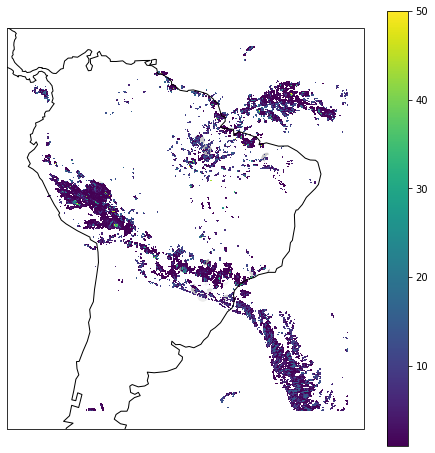

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm, Normalize
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
data = precip.copy()
data[data == 0] = np.nan
p = np.stack([precip[lat_ind, lon_ind] for lat_ind,lon_ind in zip(lat_inds, lon_inds)])
ax.scatter(lons[lon_inds], lats[lat_inds], c=p, norm=Normalize(1, 50), cmap='gray_r', s=100)
m = ax.pcolormesh(lons, lats, data, norm=Normalize(1, 50))
#ax.scatter(lons[lon_inds], lats[lat_inds])
ax.coastlines()
plt.colorbar(m)